In [ ]:
from langgraph.graph import StateGraph
from agents import ats_evaluator, jd_parser, latex_updater, refiner, resume_selector
from IPython.display import display, Markdown, Image

In [2]:
graph = StateGraph(dict) 


In [ ]:
# Add nodes
graph.add_node("parse_jd", jd_parser.run)
graph.add_node("parse_resume", resume_selector.run)
graph.add_node("select_content", refiner.run)
graph.add_node("generate_latex", latex_updater.run)
graph.add_node("evaluate", ats_evaluator.run)

In [4]:

# Connect nodes
graph.add_edge("parse_jd", "parse_resume")
graph.add_edge("parse_resume", "select_content")
graph.add_edge("select_content", "generate_latex")
graph.add_edge("generate_latex", "evaluate")

In [5]:
def decide(state):
    return "select_content" if state.get("redo_needed") else None

graph.add_conditional_edges("evaluate", decide)
graph.set_entry_point("parse_jd")

In [6]:
state = {
    "job_description": open("jd.txt").read(),
    "master_resume": "master_resume.json"
}


In [14]:
GRAPH= graph.compile(state)

In [ ]:
state = jd_parser.run(state)
display(Markdown(f"### Parsed JD\n```\n{state.get('parsed_jd', '')}\n```"))

state = resume_selector.run(state)
display(Markdown(f"### Parsed Resume\n```\n{state.get('parsed_resume', '')}\n```"))

### Parsed JD
```

```

### Parsed Resume
```

```

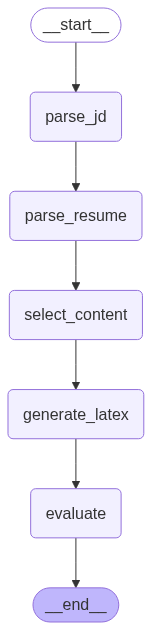

In [16]:
display(Image(GRAPH.get_graph().draw_mermaid_png()))

In [27]:
final_state = GRAPH.invoke(
    state,
    checkpoint_id="run1"
)


ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
redo = False
iteration = 1
while redo:
    display(Markdown(f"## Iteration {iteration}"))
    
    state = refiner.run(state)
    display(Markdown(f"### Selected Content\n```\n{state.get('selected_content', '')}\n```"))

    state = latex_updater.run(state)
    display(Markdown(f"### LaTeX Preview\n```\n{state.get('latex_resume', '')[:500]}...\n```"))

    state = ats_evaluator.run(state)
    display(Markdown(f"### Evaluator Result: redo_needed = {state.get('redo_needed')}"))

    redo = state.get("redo_needed", False)
    iteration += 1

In [10]:
with open("tailored_resume.tex", "w") as f:
    f.write(state["latex_resume"])

display(Markdown("✅ **Tailored LaTeX resume generated: `tailored_resume.tex`**"))

✅ **Tailored LaTeX resume generated: `tailored_resume.tex`**